### Craft a Story from a Dataset - World Happiness Report

I selected World Happiness Report Dataset to analyze and present. I chose to present to a technical audience because my analysis is more for informative purposes. I want to focus on the technical details of my analysis and help the audience understand how I came to my conclusion through the portrayal of my visuals. 

##### Here are some questions I thought of when exploring the data
- Which region/country has the highest happiness score? 
- How can I analyze the data from the region with the highest happiness score and create a solution of what all regions should do/implement/change to obtain similar high happiness scores?
- What trends can I find among social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption for each individual region that could be associated with a higher happiness score?
- Would a bar plot or histogram be more appropriate?
- Looking at whichever plot is appropriate, what are some insights I can make about correlations with the columns and happiness score? 
- What other questions are my insights leading me to ask? 

##### My hypothesis: 
I hypothesize that whichever region has higher healthy life expectancy would be the the region that has the highest happiness score because I know from my background knowledge that the science behind people who live longer psychologically means they are happier than those who don't.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

First I will read in the data just for the year of 2021.

In [2]:
data = pd.read_csv('2021.csv')

In [3]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
data.shape

(149, 20)

In [5]:
print(data['Regional indicator'].value_counts())
print(data['Country name'].value_counts())

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64
Finland         1
Ghana           1
Turkmenistan    1
Gambia          1
Benin           1
               ..
Latvia          1
Colombia        1
Hungary         1
Thailand        1
Afghanistan     1
Name: Country name, Length: 149, dtype: int64


In [6]:
# I dropped all these columns because they were either all the same values across the regions or the information provided was unhelpful to my analysis

data=data.drop(columns=['Country name', 'upperwhisker', 'lowerwhisker', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Ladder score in Dystopia'])

In [7]:
items = list(data.columns)

In [8]:
data.head()

,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,Western Europe,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,Western Europe,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,Western Europe,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798


In [9]:
data['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [10]:
data = data.sort_values(by='Regional indicator', axis=0)

Based on what I have analyzed so far about the columns, values, and information provided, I decided to plot the data as a multiple bar plots per column

array([<AxesSubplot:title={'center':'Ladder score'}, xlabel='Regional indicator'>,
       <AxesSubplot:title={'center':'Standard error of ladder score'}, xlabel='Regional indicator'>,
       <AxesSubplot:title={'center':'Logged GDP per capita'}, xlabel='Regional indicator'>,
       <AxesSubplot:title={'center':'Social support'}, xlabel='Regional indicator'>,
       <AxesSubplot:title={'center':'Healthy life expectancy'}, xlabel='Regional indicator'>,
       <AxesSubplot:title={'center':'Freedom to make life choices'}, xlabel='Regional indicator'>,
       <AxesSubplot:title={'center':'Generosity'}, xlabel='Regional indicator'>,
       <AxesSubplot:title={'center':'Perceptions of corruption'}, xlabel='Regional indicator'>,
       <AxesSubplot:title={'center':'Dystopia + residual'}, xlabel='Regional indicator'>],
      dtype=object)

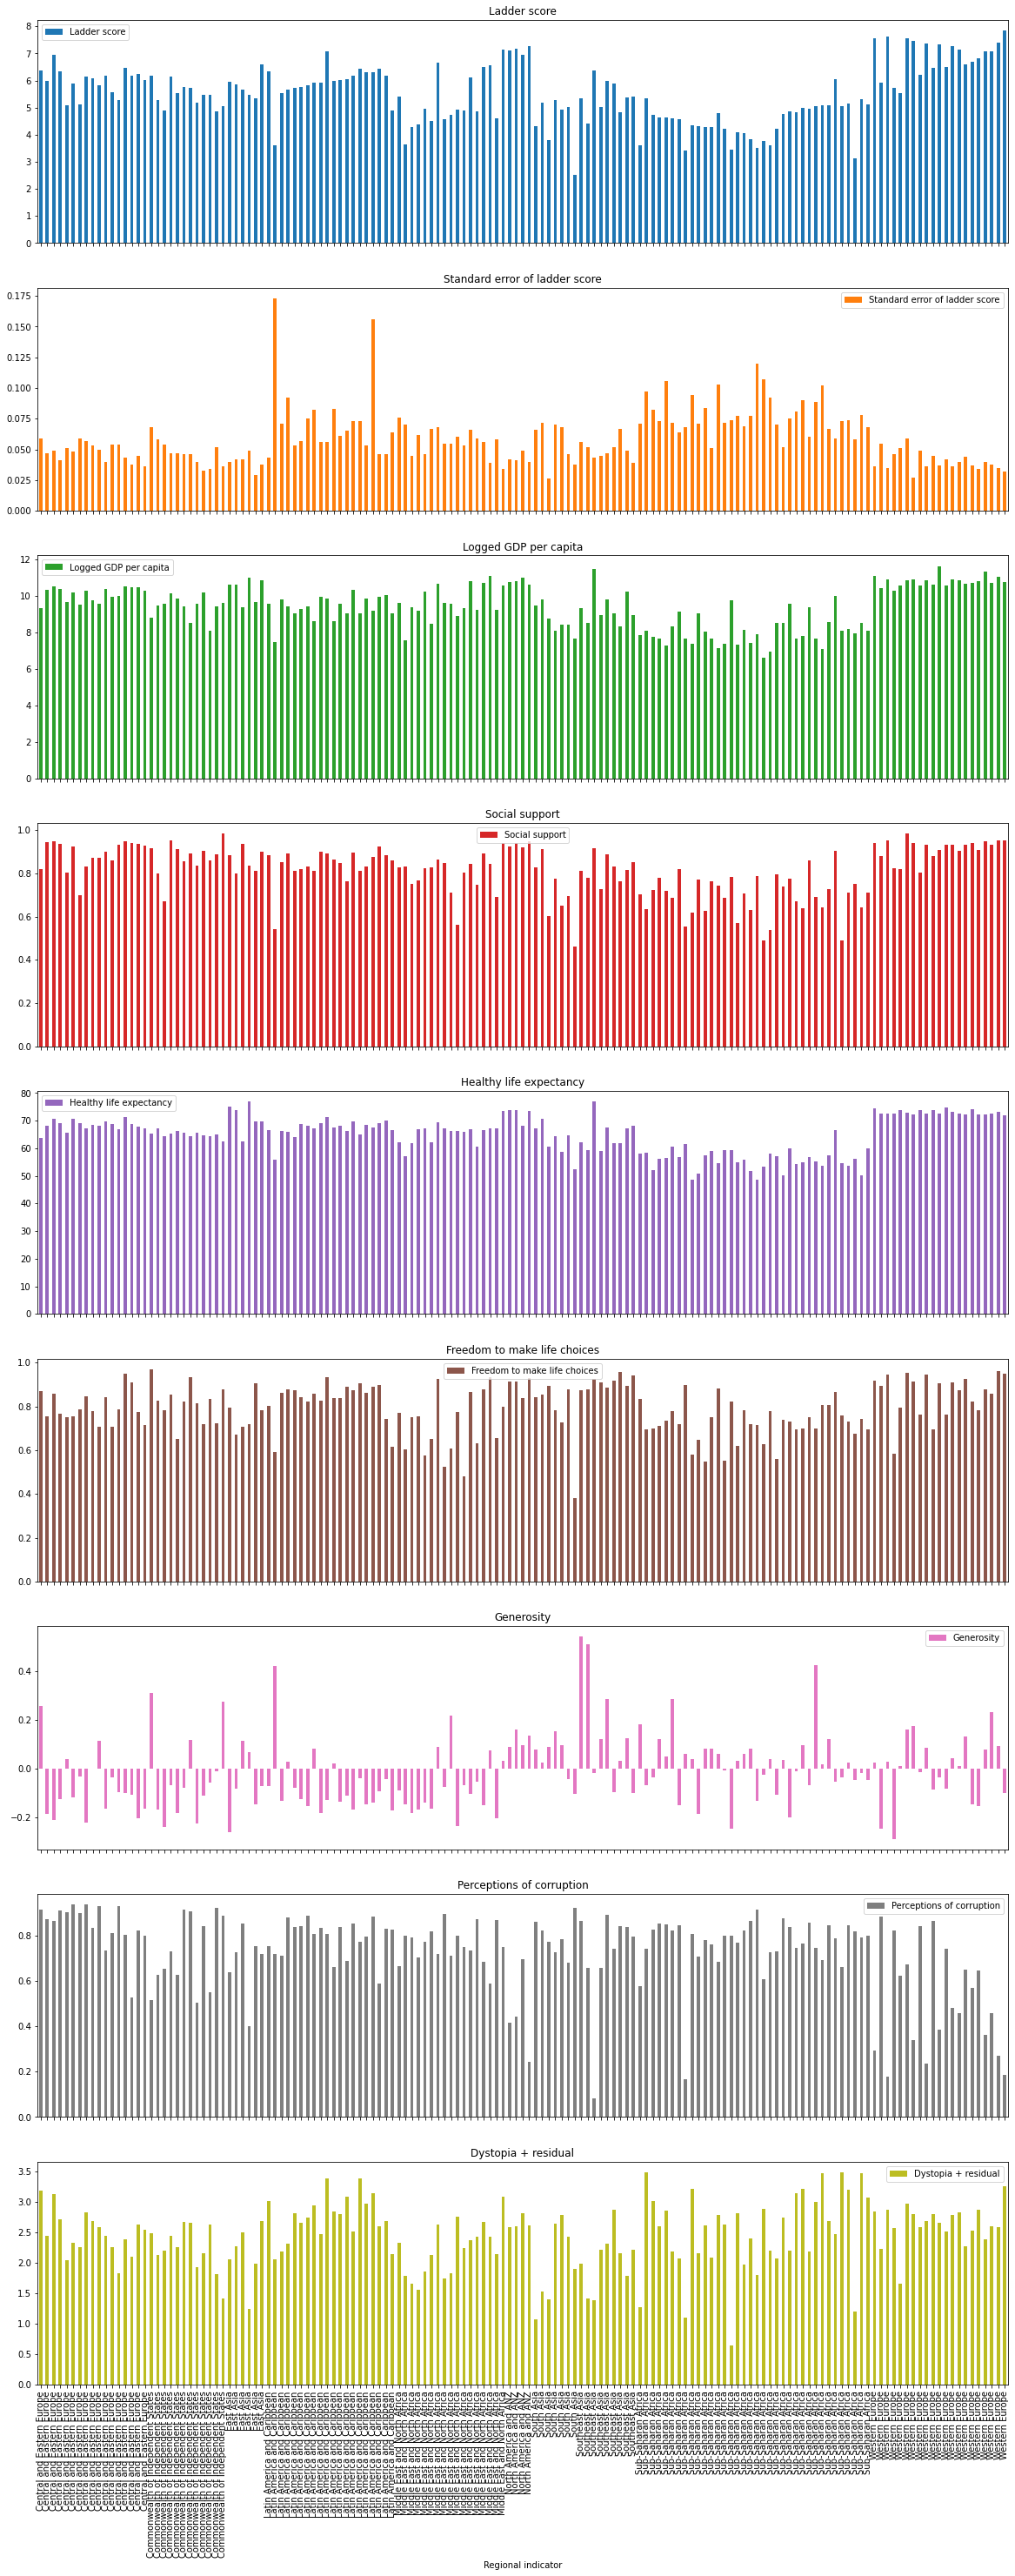

In [11]:
data.plot(kind='bar', x = 'Regional indicator',figsize=(20,50), subplots=True)

After plotting this bar graph of the data, I realized it would be much easier to analyze if I grouped the data based on Region indicator and took the mean of each column category per specified Region. 

In [23]:
columns = ['Sub-Saharan Africa', 'Western Europe', 'Latin America and Caribbean', 'Middle East and North Africa', 'Central and Eastern Europe', 'Commonwealth of Independent States', 'Southeast Asia', 'South Asia', 'East Asia','North America and ANZ']
new_data= []
for name in columns:
    row = data[data['Regional indicator']==name].mean(axis=0)
    new_data.append(row)
    
new_df = pd.DataFrame(new_data)

C:\Users\amand\AppData\Local\Temp\ipykernel_31772\2327724714.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row = data[data['Regional indicator']==name].mean(axis=0)


In [32]:
new_df = new_df.rename(index={0:'Sub-Saharan Africa', 1:'Western Europe', 2:'Latin America and Caribbean', 3:'Middle East and North Africa', 4:'Central and Eastern Europe', 5:'Commonwealth of Independent States', 6:'Southeast Asia', 7:'South Asia', 8:'East Asia',9:'North America and ANZ'})

In [36]:
new_df

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Sub-Saharan Africa,4.494472,0.078333,8.075194,0.696750,55.886472,0.723194,0.013444,0.765944,2.507722
Western Europe,6.914905,0.040667,10.822714,0.914476,73.033095,0.858714,-0.003190,0.523095,2.628762
Latin America and Caribbean,5.908050,0.073900,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600,2.733000
Middle East and North Africa,5.219765,0.057000,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235,2.210588
Central and Eastern Europe,5.984765,0.048471,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529,2.490000
Commonwealth of Independent States,5.467000,0.046750,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083,2.225750
Southeast Asia,5.407556,0.050000,9.421444,0.820333,64.888444,0.909000,0.156333,0.709111,2.033444
South Asia,4.441857,0.055143,8.682571,0.703429,62.681000,0.765000,0.042714,0.797429,1.964000
East Asia,5.810333,0.040000,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333,2.117833
North America and ANZ,7.128500,0.043000,10.809500,0.933500,72.325000,0.898750,0.120000,0.449250,2.650500


array([<AxesSubplot:title={'center':'Ladder score'}>,
       <AxesSubplot:title={'center':'Standard error of ladder score'}>,
       <AxesSubplot:title={'center':'Logged GDP per capita'}>,
       <AxesSubplot:title={'center':'Social support'}>,
       <AxesSubplot:title={'center':'Healthy life expectancy'}>,
       <AxesSubplot:title={'center':'Freedom to make life choices'}>,
       <AxesSubplot:title={'center':'Generosity'}>,
       <AxesSubplot:title={'center':'Perceptions of corruption'}>,
       <AxesSubplot:title={'center':'Dystopia + residual'}>], dtype=object)

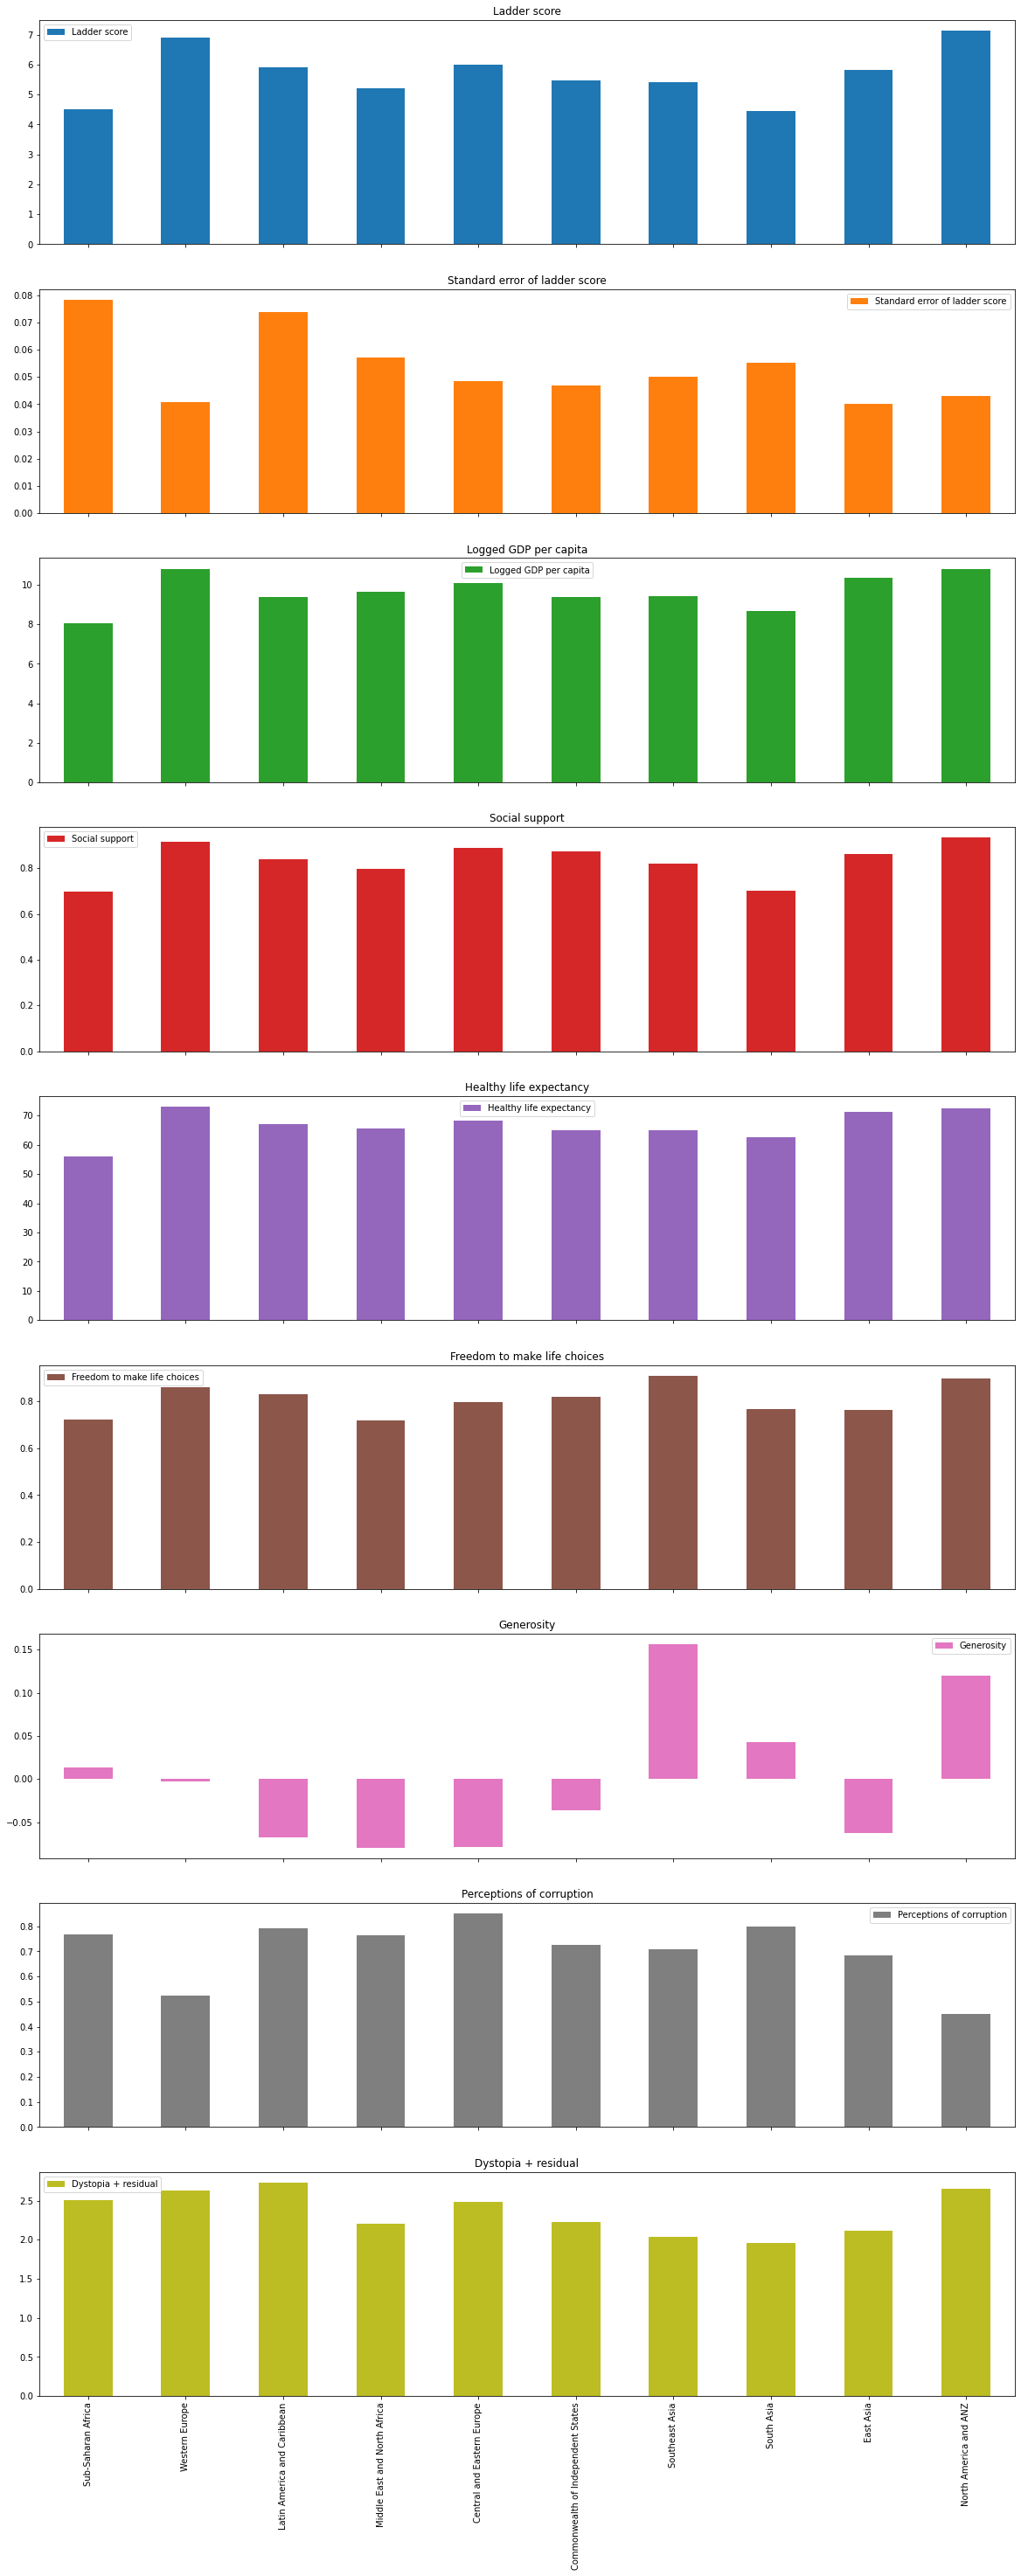

In [37]:
new_df.plot(kind='bar',figsize=(20,50), subplots=True)

##### Bar graph analysis: 
The three regions with the highest happiness scores were Western Europe, North America and ANZ, and Central and Eastern Europe. These three regions also have the highest GDP per capita, highest social support, and highest healthy life expectancy. Western Europe and North America and ANZ had the highest freedom to make life choices, and Central and Eastern Europe did not, but it still had a relatively high value in comparison to the rest of the regions. North America and ANZ was the only region of the three that had a high Generosity value amongst the three top regions. This isn't too surprising because how happy someone is doesn't directly need to correlate to how generous they are, but there is the possibility of it affecting happiness score slightly.Another interesting fact is that both Western Europe and North America and ANZ had the lowest perceptions of corruption values, which is a good thing and what I believed would correlate to a higher happiness score. However, Central and Eastern Europe had the highest perception of corruption value, which displays that the level of corruption a person perceives does not correlate to their happiness. This is interesting because it could possibly mean that although the Central and Eastern Europe region is overall happier than the other regions, their lower freedom to make life choices and higher perception of corruption may be what is stopping the region from being as happy as the other two regions. 
(Note: all my analysis is based on the average mean values of each region)

##### Conclusion: 
The region with the highest happiness score is Central and Eastern Europe. This region had the highest logged GDP per capita, highest social support, highest healthy life expectancy, highest freedom to make life choices, lowest perception of corruption, and second highest generosity value. From my analysis and findings, I have concluded that having a high healthy life expectancy does indeed correlate to a higher happiness score. Additionally, as it is important to have high values for logged GDP per capita, social support, freedom to make life choices, generosity, and low perceptions of corruption, the most important factors that allow a region to have very high happiness scores are freedom to make life choices and perception of corruption. Without optimizing these two variables, the region's happiness score can not be the highest even with higher scores for the other important variables. 

In order to increase the world's happiness, this dataset shows us essentially that freedom and belief in the righteousness of one's respective country should be optimized. 